### Exploratory Data Analysis with Visualization ###

In [9]:
!pip install pandas
!pip install -U scikit-learn
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install plotly
!pip install requests
!pip install sqlalchemy==1.3.9
!pip install ipython-sql
!pip install ipython-sql prettytable
!pip install -q pandas

%load_ext sql
%sql sqlite:///my_data1.db
    
import pandas as pd
import requests
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

  Using cached SQLAlchemy-1.3.9.tar.gz (6.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



#### Read the SpaceX Dataset into a Pandas DataFrame ####

In [11]:
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = requests.get(URL)
dataset_part_2_csv = io.StringIO(resp.text)
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


#### Plot FlightNumber vs. PayLoadMass ####

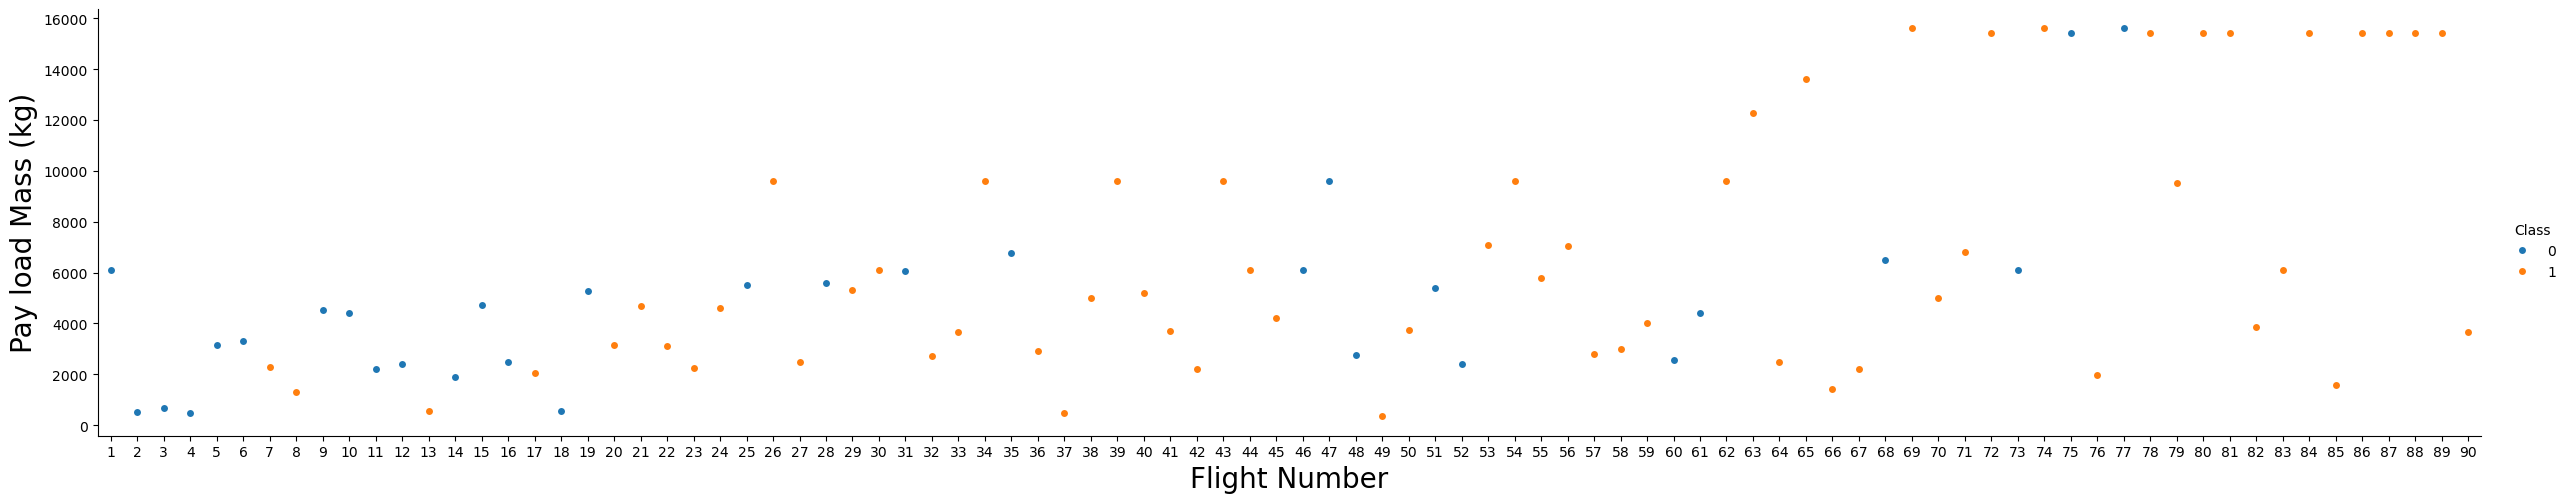

In [13]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

#### Task 1: Visualize the Relationship between Flight Number and Launch Site ####

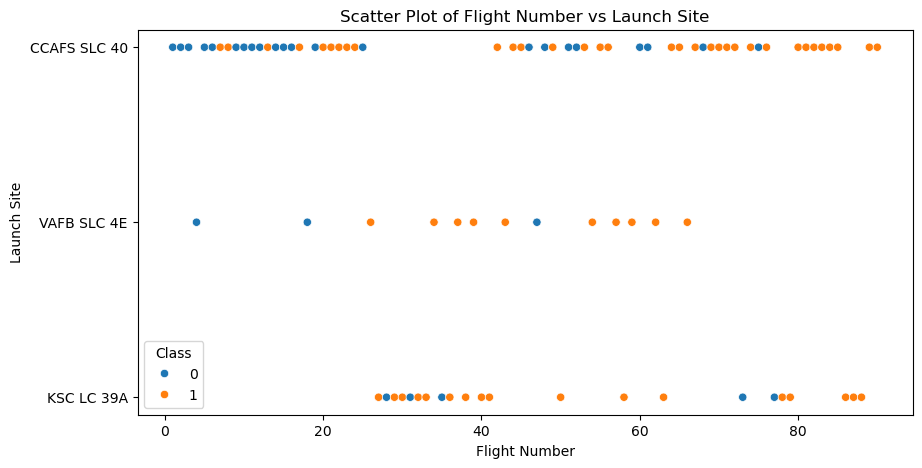

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="FlightNumber", y="LaunchSite", hue="Class")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.title("Scatter Plot of Flight Number vs Launch Site")
plt.show()

#### Task 2: Visualize the Relationship between Payload Mass and Launch Site ####

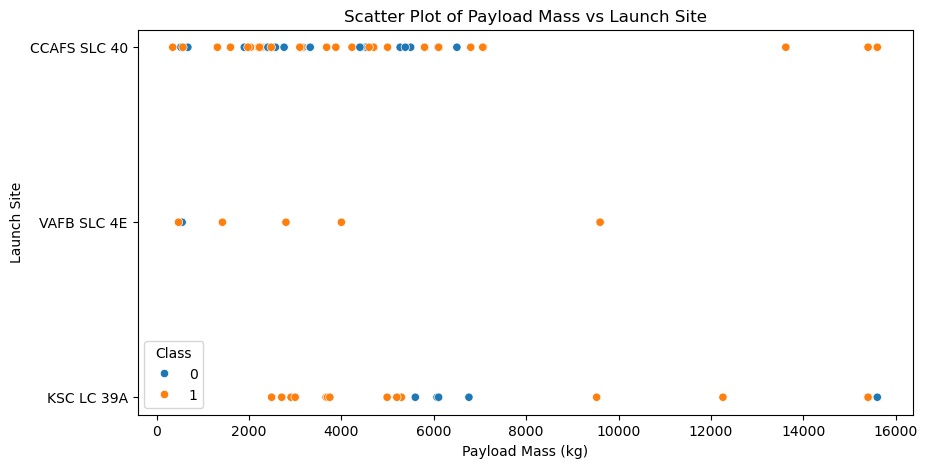

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.title("Scatter Plot of Payload Mass vs Launch Site")
plt.show()

#### Task 3: Visualize the Relationship between Success Rate of Each Orbit Type ####

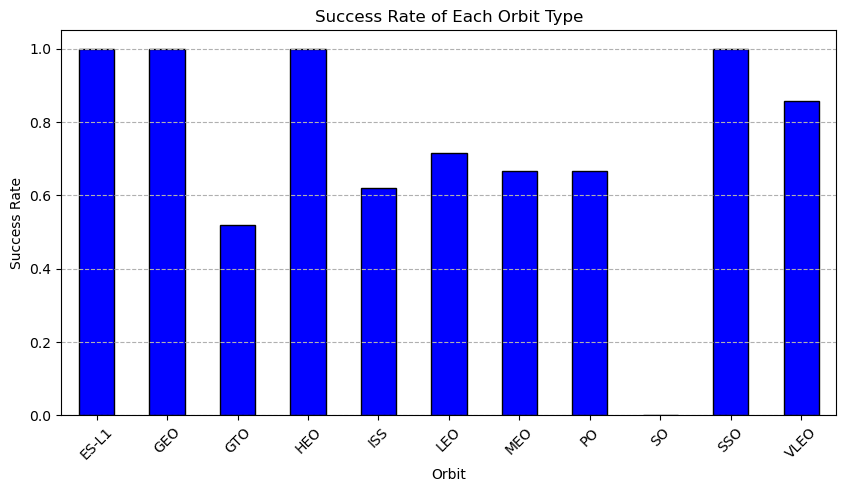

In [34]:
orbit_success_rate = df.groupby("Orbit")["Class"].mean()
plt.figure(figsize=(10,5))
orbit_success_rate.plot(kind="bar", color="blue", edgecolor="black")
plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.title("Success Rate of Each Orbit Type")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--")  # Add grid lines for clarity

#### Task 4: Visualize the Relationship between Flight Number and Orbit Type #### 

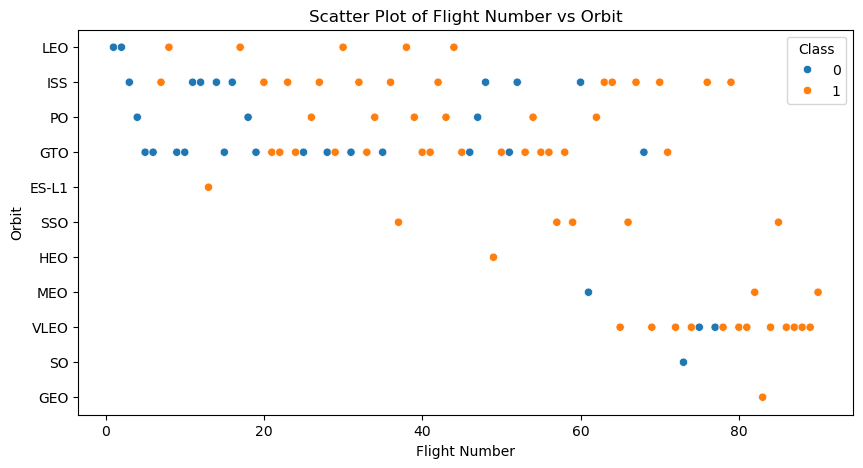

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="FlightNumber", y="Orbit", hue="Class")
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.title("Scatter Plot of Flight Number vs Orbit")
plt.show()

#### Task 5: Visualize the Relationship between Payload Mass and Orbit Type ####

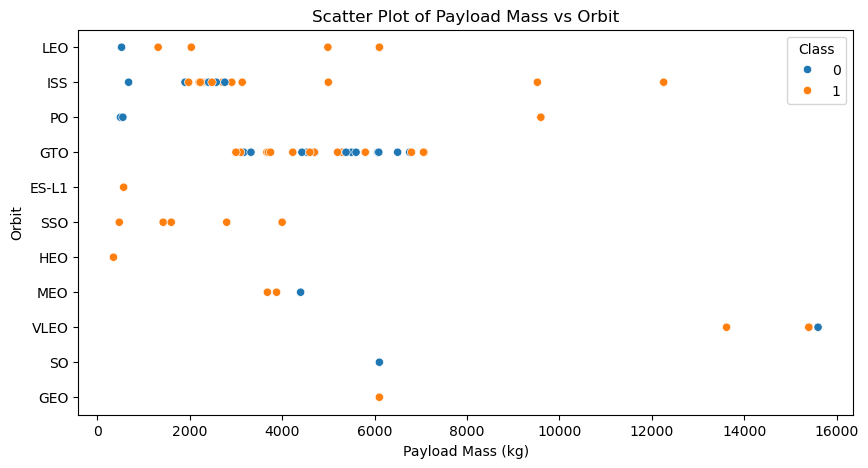

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="PayloadMass", y="Orbit", hue="Class")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit")
plt.title("Scatter Plot of Payload Mass vs Orbit")
plt.show()

#### Task 6: Visualize the Launch Success Yearly Trend ####

   FlightNumber  Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  Year  
0            0  B0003  -80.577366  28.561857      0  2010  
1            0  B000

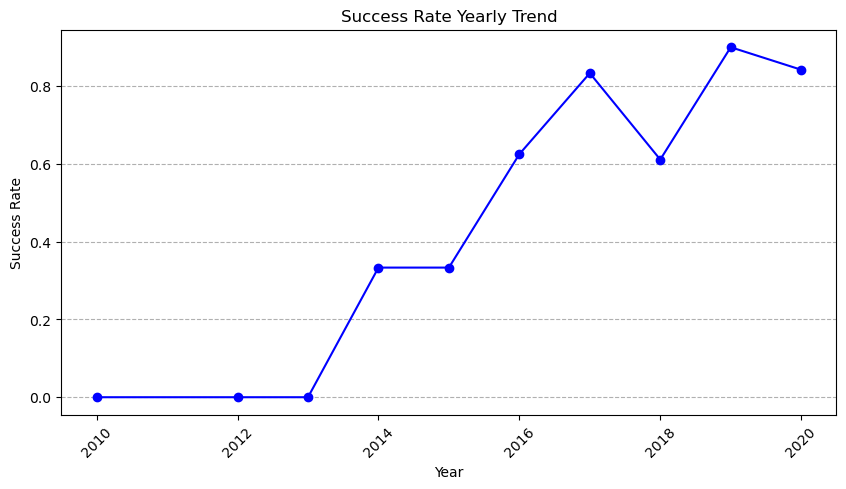

In [48]:
Year=[]
def Extract_year():
    for i in df["Date"]:
        Year.append(i.split("-")[0])
    return Year
Extract_year()
df['Date'] = Year
df['Year'] = df['Date'].astype(int)
print(df.head())

average_success_rate = df.groupby("Year")["Class"].mean()
plt.figure(figsize=(10,5))
plt.plot(average_success_rate.index, average_success_rate.values, marker='o', linestyle='-', color='blue', label="Success Rate")

plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.title("Success Rate Yearly Trend")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
# plt.legend()
plt.show()

#### Task 7: Create Dummy Variables to Categorical Columns ####

In [59]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
print(features.head())
categorical_columns = ["Orbit", "LaunchSite", "LandingPad", "Serial"]
features_one_hot = pd.get_dummies(features, columns=categorical_columns)
print(features_one_hot.tail())

   FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004  
    FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
85            86      15400.0        2      True    True  True    5.0   
86            87      15400.0        3      True    True  True    5.0   
87          

#### Task 8: Cast All Numberic Columns to float64 ####

In [66]:
features_one_hot = features_one_hot.astype(float)
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0           1.0  6104.959412      1.0       0.0     0.0   0.0    1.0   
1           2.0   525.000000      1.0       0.0     0.0   0.0    1.0   
2           3.0   677.000000      1.0       0.0     0.0   0.0    1.0   
3           4.0   500.000000      1.0       0.0     0.0   0.0    1.0   
4           5.0  3170.000000      1.0       0.0     0.0   0.0    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0          0.0          0.0        0.0  ...           0.0           0.0   
1          0.0          0.0        0.0  ...           0.0           0.0   
2          0.0          0.0        0.0  ...           0.0           0.0   
3          0.0          0.0        0.0  ...           0.0           0.0   
4          0.0          0.0        0.0  ...           0.0           0.0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0           0.0           0.0           0

#### Export the features_one_hot dataframe to csv ####

In [69]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)